In [1]:
# Importación de librerías esenciales para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
import pickle
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Configuración de visualización
plt.style.use("classic")
sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.labelsize"] = 12

In [2]:
# Cargar el archivo JSON
file_path = "../../data/outputs/2_data_preprocessing/fichas_tecnicas_mapped_atc.json"
medicamentos_df = pd.read_json(file_path)

# Normalizar nombres de columnas (quitar tildes, espacios y convertir a minúsculas)
medicamentos_df.columns = [
    unidecode.unidecode(col).lower().replace(" ", "_")
    for col in medicamentos_df.columns
]

# Mostrar las primeras filas para verificar
print("Primeras filas del dataset:")
display(medicamentos_df.head())

# Información general
print("\nInformación del dataset:")
display(medicamentos_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(medicamentos_df.describe(include="all"))

# Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = medicamentos_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(medicamentos_df)) * 100
missing_df = pd.DataFrame(
    {"Valores faltantes": missing_values, "Porcentaje (%)": missing_percent}
)
display(missing_df[missing_df["Valores faltantes"] > 0])

Primeras filas del dataset:


,indicaciones,posologia,contraindicaciones,advertencias,interacciones,fertilidad_embarazo,efectos_conducir,reacciones_adversas,sobredosis,atc,...,atc_nivel_anatomico,descripcion_nivel_anatomico,atc_nivel_2_subgrupo_terapeutico,descripcion_nivel_2_subgrupo_terapeutico,atc_nivel_3_subgrupo_terapeutico_farmacologico,descripcion_nivel_3_subgrupo_terapeutico_farmacologico,atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico,descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico,atc_nivel_5_principio_activo,descripcion_nivel_5_principio_activo
0,en base a su efecto antiagregante plaquetario ...,posología: como inhibidor de la agregación pla...,no se debe administrar ácido acetilsalicílico ...,dado el efecto antiagregante plaquetario del á...,combinaciones contraindicadas : metotrexato ut...,embarazo el ácido acetilsalicílico atraviesa l...,no se ha observado ningún efecto sobre la capa...,los efectos adversos del ácido acetilsalicílic...,diagnóstico: - los síntomas de intoxicación mo...,B01AC06,...,B,sangre y órganos hematopoyéticos,B01,agentes antitrombóticos,B01A,agentes antitrombóticos,B01AC,inhibidores de la agregación plaquetaria excl....,B01AC06,ácido acetilsalicílico
1,tratamiento o alivio sintomático del dolor oca...,posología: dosis media recomendada: adultos y ...,no se debe administrar ácido acetilsalicílico ...,dado el efecto antiagregante plaquetario del á...,combinaciones contraindicadas : metotrexato ut...,embarazo el ácido acetilsalicílico atraviesa l...,no se ha observado ningún efecto sobre la capa...,los efectos adversos del ácido acetilsalicílic...,diagnóstico: - los síntomas de intoxicación mo...,N02BA01,...,N,sistema nervioso,N02,analgésicos,N02B,otros analgésicos y antipiréticos,N02BA,ácido salicílico y derivados,N02BA01,ácido acetilsalicílico
2,alivio de los síntomasde procesos catarrales y...,posología: adultos mayores de 18 años: 1 sobre...,insuficiencia renal y hepática grave. - hipers...,"- debido a su contenido en paracetamol, se deb...",interacciones debidas al paracetamol: el parac...,embarazo: paracetamol: datos epidemiológicos d...,este medicamento puede producir somnolencia al...,durante el periodo de utilización del paraceta...,paracetamol: la sintomatología por sobredosis ...,N02BE51,...,N,sistema nervioso,N02,analgésicos,N02B,otros analgésicos y antipiréticos,N02BE,anilidas,N02BE51,"paracetamol, combinaciones excl. psicolépticos"
3,abacavir accord está indicado en el tratamient...,abacavir se debe prescribir por médicos con ex...,hipersensibilidad a abacavir o a alguno de los...,reacciones de hipersensibilidad (ver también s...,el potencial de interacciones mediadas por el ...,"embarazo como norma general, cuando se tome la...",no se han realizado estudios de los efectos so...,en el caso de muchas reacciones adversas comun...,se han administrado dosis únicas de hasta 1.20...,J05AF06,...,J,antiinfecciosos para uso sistémico,J05,antivirales para uso sistémico,J05A,antivirales de acción directa,J05AF,inhibidores de transcriptasa inversa análogos ...,J05AF06,abacavir
4,abacavir/lamivudina accord está indicado en el...,el tratamiento debe ser prescrito por un médic...,hipersensibilidad a los principios activos o a...,se incluyen en este epígrafe las advertencias ...,este medicamento contiene abacavir y lamivudin...,"embarazo como norma general, cuando se decida ...",no se han realizado estudios de los efectos so...,resumen del perfil de seguridad las reacciones...,no se han identificado síntomas o signos espec...,J05AR02,...,J,antiinfecciosos para uso sistémico,J05,antivirales para uso sistémico,J05A,antivirales de acción directa,J05AR,"antivirales para tratamiento de VIH, combinaci...",J05AR02,lamivudina y abacavir



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19909 entries, 0 to 19908
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   indicaciones                                                    19571 non-null  object
 1   posologia                                                       19828 non-null  object
 2   contraindicaciones                                              19855 non-null  object
 3   advertencias                                                    19830 non-null  object
 4   interacciones                                                   19550 non-null  object
 5   fertilidad_embarazo                                             19706 non-null  object
 6   efectos_conducir                                                19828 non-null  object
 7   reacciones_adversas             

None


Estadísticas descriptivas:


,indicaciones,posologia,contraindicaciones,advertencias,interacciones,fertilidad_embarazo,efectos_conducir,reacciones_adversas,sobredosis,atc,...,atc_nivel_anatomico,descripcion_nivel_anatomico,atc_nivel_2_subgrupo_terapeutico,descripcion_nivel_2_subgrupo_terapeutico,atc_nivel_3_subgrupo_terapeutico_farmacologico,descripcion_nivel_3_subgrupo_terapeutico_farmacologico,atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico,descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico,atc_nivel_5_principio_activo,descripcion_nivel_5_principio_activo
count,19571,19828,19855,19830,19550,19706,19828,19841,19766,17592,...,17592,17176,17592,16692,17592,16687,13929,13195,12723,12238
unique,9385,13044,8576,13026,10793,9958,6355,13815,8100,1983,...,30,14,331,91,541,221,883,499,1295,1089
top,"tratamiento de la hipercolesterolemia adultos,...",posología adultos la dosis recomendada es de 1...,hipersensibilidad al principio activo o a algu...,se debe informar con claridad a los pacientes ...,no se han realizado estudios de interacciones.,embarazo no se ha evaluado la seguridad y efic...,no procede.,resumen del perfil de seguridad la seguridad d...,no existe un tratamiento específico en caso de...,N05A,...,N,sistema nervioso,C09,agentes que actúan sobre el sistema renina-ang...,C09D,bloqueadores de los receptores de angiotensina...,N03AX,otros antiepilépticos,C10AA05,atorvastatina
freq,116,75,1807,20,148,102,282,19,180,387,...,4491,4491,1635,1635,840,840,602,602,235,235



Valores faltantes por columna:


,Valores faltantes,Porcentaje (%)
descripcion_nivel_5_principio_activo,7671,38.530313
atc_nivel_5_principio_activo,7186,36.094229
descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico,6714,33.723442
atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico,5980,30.036667
descripcion_nivel_3_subgrupo_terapeutico_farmacologico,3222,16.183636
descripcion_nivel_2_subgrupo_terapeutico,3217,16.158521
descripcion_nivel_anatomico,2733,13.727460
fecha_revision,2415,12.130192
atc_nivel_3_subgrupo_terapeutico_farmacologico,2317,11.637953
atc_nivel_2_subgrupo_terapeutico,2317,11.637953


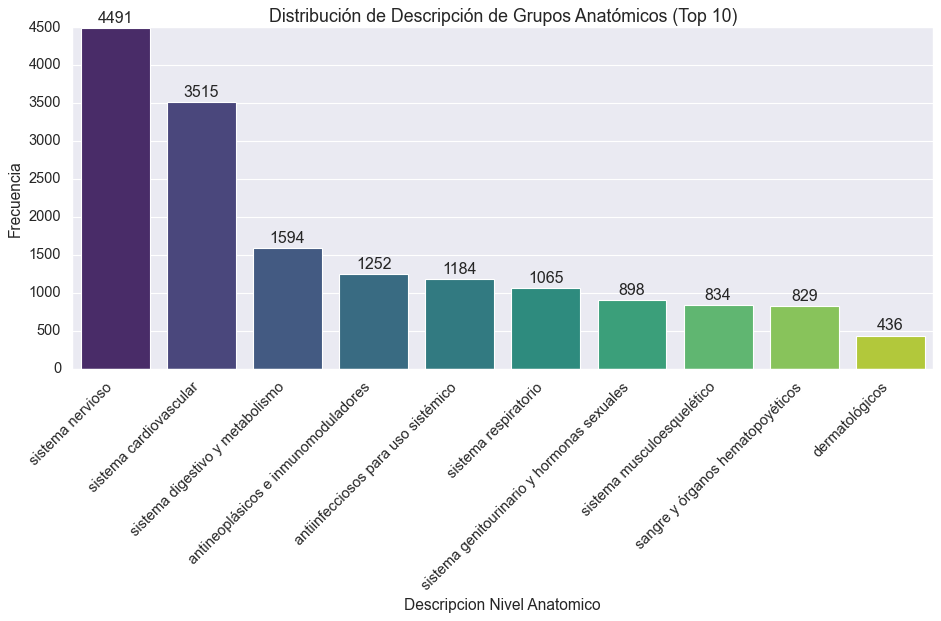

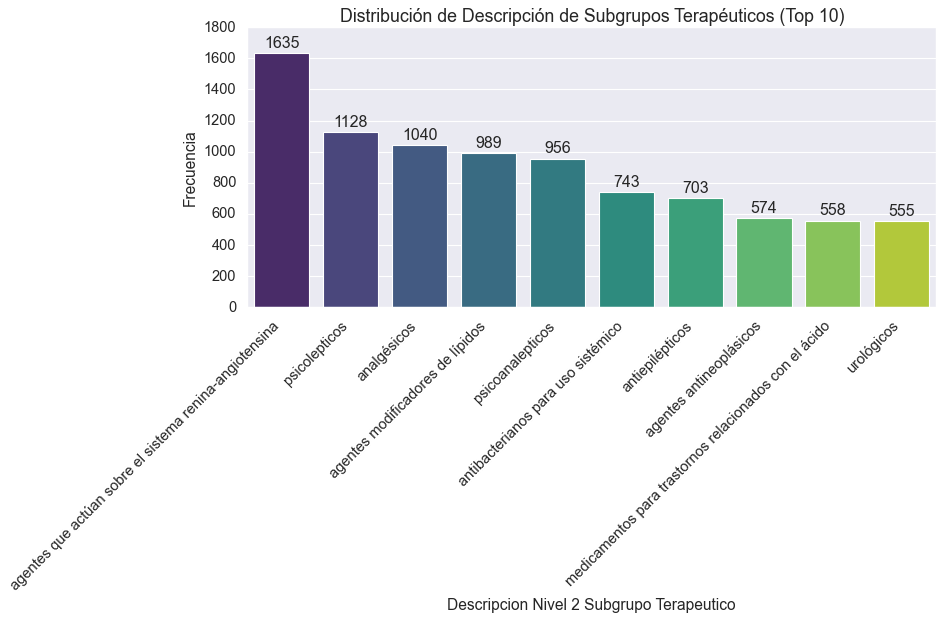

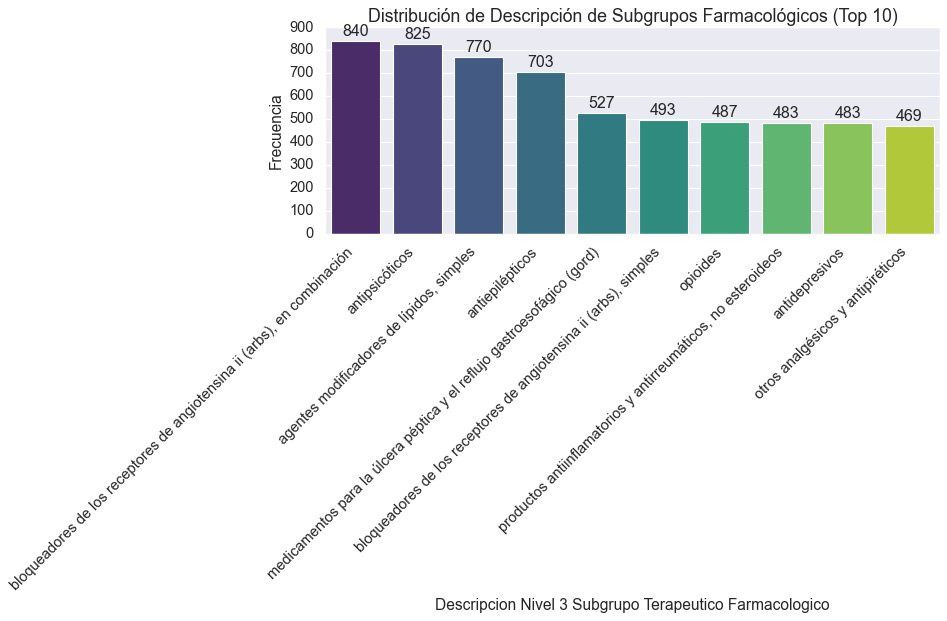

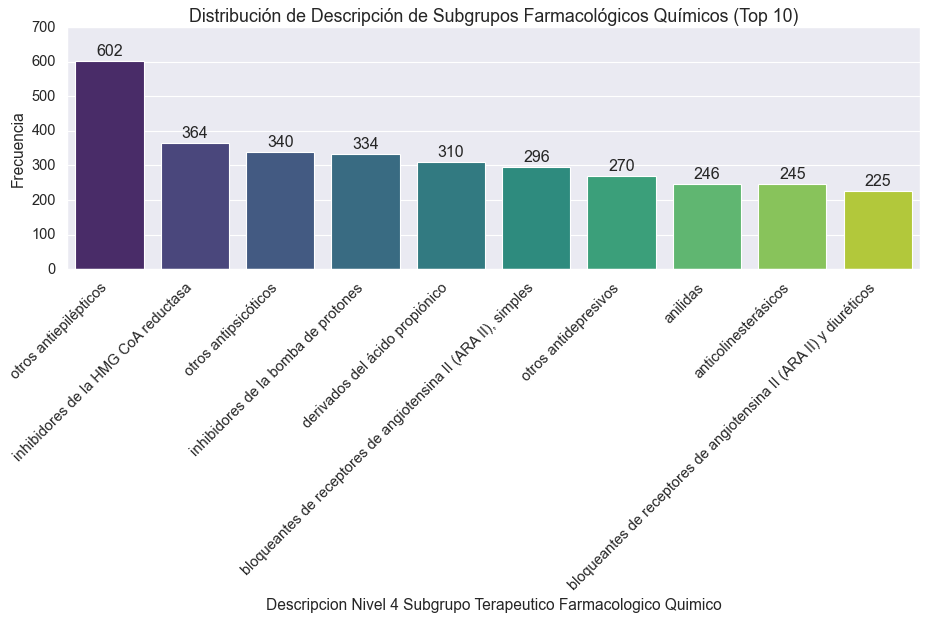

In [3]:
# Función para crear gráficos de distribución de categorías
def plot_category_distribution(
    dataframe, column, description_column, title, top_n=10, palette="viridis"
):
    plt.figure(figsize=(12, 8))

    # Obtener las top_n categorías más frecuentes en las descripciones
    top_categories = dataframe[description_column].value_counts().head(top_n)

    # Crear el gráfico
    ax = sns.barplot(
        x=top_categories.index,
        y=top_categories.values,
        palette=palette,
        hue=top_categories.index,
    )

    # Añadir etiquetas y título
    plt.title(f"{title} (Top {top_n})", fontsize=16)
    plt.xlabel(description_column.replace("_", " ").title(), fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # Añadir valores en las barras
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), ".0f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )

    plt.tight_layout()
    plt.show()


# Distribución de Descripción de Grupos Anatómicos
# En principio nos quedamos con esta categoría para el análisis únicamente
plot_category_distribution(
    medicamentos_df,
    "atc_nivel_anatomico",
    "descripcion_nivel_anatomico",
    "Distribución de Descripción de Grupos Anatómicos",
)

# Distribución de Descripción de Subgrupos Terapéuticos
plot_category_distribution(
    medicamentos_df,
    "atc_nivel_2_subgrupo_terapeutico",
    "descripcion_nivel_2_subgrupo_terapeutico",
    "Distribución de Descripción de Subgrupos Terapéuticos",
)

# Distribución de Descripción de Subgrupos Farmacológicos
plot_category_distribution(
    medicamentos_df,
    "atc_nivel_3_subgrupo_terapeutico_farmacologico",
    "descripcion_nivel_3_subgrupo_terapeutico_farmacologico",
    "Distribución de Descripción de Subgrupos Farmacológicos",
)

# Distribución de Descripción de Subgrupos Farmacológicos Químicos
plot_category_distribution(
    medicamentos_df,
    "atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
    "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
    "Distribución de Descripción de Subgrupos Farmacológicos Químicos",
)

In [4]:
medicamentos_df.columns

Index(['indicaciones', 'posologia', 'contraindicaciones', 'advertencias',
       'interacciones', 'fertilidad_embarazo', 'efectos_conducir',
       'reacciones_adversas', 'sobredosis', 'atc',
       'propiedades_farmacocineticas', 'excipientes', 'incompatibilidades',
       'precauciones_conservacion', 'fecha_revision', 'nombre_archivo',
       'atc_nivel_anatomico', 'descripcion_nivel_anatomico',
       'atc_nivel_2_subgrupo_terapeutico',
       'descripcion_nivel_2_subgrupo_terapeutico',
       'atc_nivel_3_subgrupo_terapeutico_farmacologico',
       'descripcion_nivel_3_subgrupo_terapeutico_farmacologico',
       'atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico',
       'descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico',
       'atc_nivel_5_principio_activo', 'descripcion_nivel_5_principio_activo'],
      dtype='object')

In [5]:
# Descargar recursos necesarios de NLTK
nltk.download("punkt")

# Cargar stopwords desde el archivo
with open("../../assets/spanish_stopwords.txt", "r", encoding="utf-8") as f:
    stopwords_set = set(f.read().splitlines())

# Lista de columnas de texto con descripciones (sin incluir los códigos ATC)
cols_texto = [
    "indicaciones",
    "posologia",
    "contraindicaciones",
    "advertencias",
    "interacciones",
    "fertilidad_embarazo",
    "efectos_conducir",
    "reacciones_adversas",
    "sobredosis",
    "atc",
    "propiedades_farmacocineticas",
    "excipientes",
    "incompatibilidades",
    "precauciones_conservacion",
    "fecha_revision",
    "nombre_archivo",
    "descripcion_nivel_anatomico",
    "descripcion_nivel_2_subgrupo_terapeutico",
    "descripcion_nivel_3_subgrupo_terapeutico_farmacologico",
    "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
    "descripcion_nivel_5_principio_activo",
]


# Función de limpieza de texto mejorada
def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres especiales y números
    texto = re.sub(r"[^\w\s]", " ", texto)
    texto = re.sub(r"\d+", " ", texto)
    # Eliminar espacios múltiples
    texto = re.sub(r"\s+", " ", texto)
    return texto.strip()


# Aplicar la limpieza a cada columna de texto y unir
texto_por_medicamento = medicamentos_df[cols_texto].fillna("").applymap(limpiar_texto)
texto_concatenado = texto_por_medicamento.apply(lambda row: " ".join(row), axis=1)

# Crear un DataFrame con el ID del medicamento y su texto concatenado
texto_medicamentos_df = pd.DataFrame(
    {
        "medicamento": medicamentos_df["nombre_archivo"],
        "descripcion_nivel_anatomico": medicamentos_df["descripcion_nivel_anatomico"],
        "descripcion_nivel_2_subgrupo_terapeutico": medicamentos_df[
            "descripcion_nivel_2_subgrupo_terapeutico"
        ],
        "descripcion_nivel_3_subgrupo_terapeutico_farmacologico": medicamentos_df[
            "descripcion_nivel_3_subgrupo_terapeutico_farmacologico"
        ],
        "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico": medicamentos_df[
            "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico"
        ],
        "descripcion_nivel_5_principio_activo": medicamentos_df[
            "descripcion_nivel_5_principio_activo"
        ],
        "texto_completo": texto_concatenado,
    }
)

# Mostrar ejemplos de texto procesado
print("Ejemplos de texto procesado por medicamento:")
display(texto_medicamentos_df[["medicamento", "texto_completo"]].head(2))

# Unir todo el texto para análisis global
texto_completo = " ".join(texto_concatenado.tolist())
print(f"Longitud total del corpus: {len(texto_completo)} caracteres")

[nltk_data] Downloading package punkt to /Users/angel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/var/folders/z5/zr60226s2gq4ynyhdp9jgp1h0000gn/T/ipykernel_569/4188320619.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  texto_por_medicamento = medicamentos_df[cols_texto].fillna("").applymap(limpiar_texto)


Ejemplos de texto procesado por medicamento:


,medicamento,texto_completo
0,A.A.S._100_mg_COMPRIMIDOS.txt,en base a su efecto antiagregante plaquetario ...
1,A.A.S._500_mg_COMPRIMIDOS.txt,tratamiento o alivio sintomático del dolor oca...


Longitud total del corpus: 686299354 caracteres


In [ ]:
# Definir carpeta de salida
output_folder = "../../data/outputs/3_eda/word_clouds"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 🔹 WordCloud global con TODAS las columnas de texto
texto_completo = " ".join(texto_medicamentos_df["texto_completo"].dropna())

plt.figure(figsize=(14, 10))
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    stopwords=stopwords_set,
    max_words=200,
    colormap="viridis",
    contour_width=1,
    contour_color="steelblue",
).generate(texto_completo)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Todas las Descripciones", fontsize=18)
plt.tight_layout()

# Guardar wordcloud global
global_filename = os.path.join(output_folder, "wordcloud_global.png")
plt.savefig(global_filename, bbox_inches="tight")
plt.close()
print(f"WordCloud global guardado en: {global_filename}")

# 🔹 WordClouds por cada grupo anatómico considerando TODAS sus columnas
grupos_anatomicos = (
    texto_medicamentos_df["descripcion_nivel_anatomico"].dropna().unique()
)

for grupo in grupos_anatomicos:
    # Filtrar TODO el texto asociado a este grupo anatómico
    texto_grupo = " ".join(
        texto_medicamentos_df[
            texto_medicamentos_df["descripcion_nivel_anatomico"] == grupo
        ]["texto_completo"]
    )
    texto_grupo = re.sub(r"[^\w\s]", " ", texto_grupo.lower())  # Limpieza

    if len(texto_grupo) > 20:  # Verificar que haya suficiente texto
        plt.figure(figsize=(12, 8))
        wordcloud = WordCloud(
            width=1000,
            height=600,
            background_color="white",
            stopwords=stopwords_set,
            colormap="plasma",
            max_words=100,
        ).generate(texto_grupo)

        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Términos frecuentes en: {grupo}", fontsize=16)
        plt.tight_layout()

        # Sanitizar el nombre del archivo a partir del grupo
        grupo_filename = re.sub(r"[^\w\-]", "_", grupo) + ".png"
        filepath = os.path.join(output_folder, grupo_filename)
        plt.savefig(filepath, bbox_inches="tight")
        plt.close()
        print(f"WordCloud para el grupo '{grupo}' guardado en: {filepath}")

WordCloud global guardado en: ../../data/wordcloud_global.png
WordCloud para el grupo 'sangre y órganos hematopoyéticos' guardado en: ../../data/sangre_y_órganos_hematopoyéticos.png
WordCloud para el grupo 'sistema nervioso' guardado en: ../../data/sistema_nervioso.png
WordCloud para el grupo 'antiinfecciosos para uso sistémico' guardado en: ../../data/antiinfecciosos_para_uso_sistémico.png
WordCloud para el grupo 'sistema genitourinario y hormonas sexuales' guardado en: ../../data/sistema_genitourinario_y_hormonas_sexuales.png
WordCloud para el grupo 'sistema digestivo y metabolismo' guardado en: ../../data/sistema_digestivo_y_metabolismo.png
WordCloud para el grupo 'sistema cardiovascular' guardado en: ../../data/sistema_cardiovascular.png
WordCloud para el grupo 'dermatológicos' guardado en: ../../data/dermatológicos.png
WordCloud para el grupo 'órganos sensoriales' guardado en: ../../data/órganos_sensoriales.png
WordCloud para el grupo 'antineoplásicos e inmunomoduladores' guardado

/Users/angel/miniconda3/envs/no_str/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['específicos', 'medicamentos', 'términos'] not in stop_words.
  warnings.warn(
/Users/angel/miniconda3/envs/no_str/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['específicos', 'medicamentos', 'términos'] not in stop_words.
  warnings.warn(


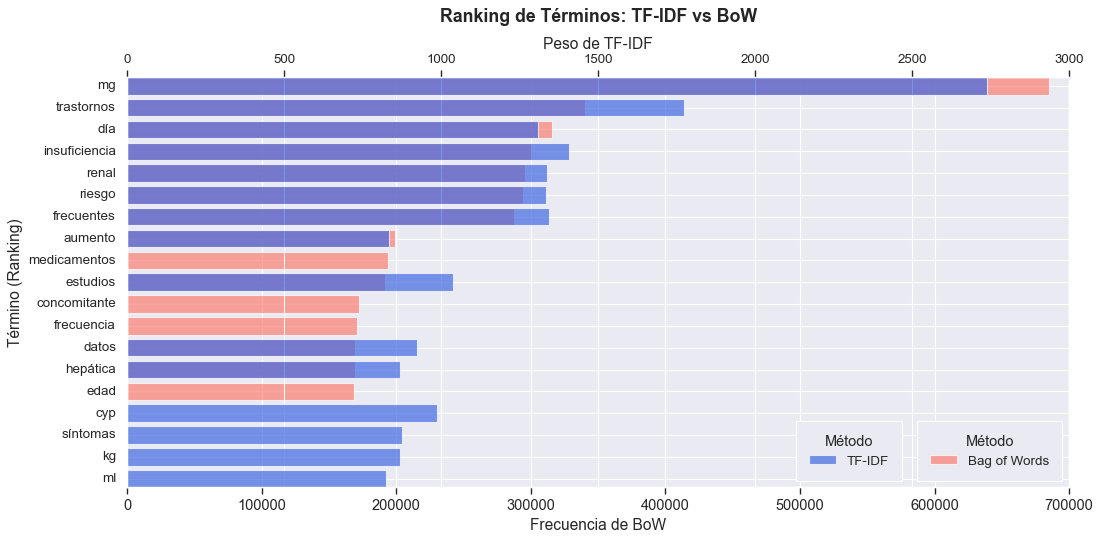

In [7]:
# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(stopwords_set), max_features=1000, ngram_range=(1, 2)
)
tfidf_matrix = tfidf_vectorizer.fit_transform(texto_medicamentos_df["texto_completo"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
tfidf_df.index = texto_medicamentos_df["medicamento"]

# Vectorización con Bag of Words
count_vectorizer = CountVectorizer(
    stop_words=list(stopwords_set), max_features=1000, ngram_range=(1, 2)
)
bow_matrix = count_vectorizer.fit_transform(texto_medicamentos_df["texto_completo"])
bow_feature_names = count_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_feature_names)
bow_df.index = texto_medicamentos_df["medicamento"]

# Obtener los términos más relevantes
top_terms_tfidf = tfidf_df.sum().sort_values(ascending=False).head(15)
top_terms_bow = bow_df.sum().sort_values(ascending=False).head(15)

# Unir en un solo DataFrame y ordenarlo por la suma total
comparison_df = pd.DataFrame({"TF-IDF": top_terms_tfidf, "BoW": top_terms_bow}).fillna(
    0
)
comparison_df["Total"] = comparison_df["TF-IDF"] + comparison_df["BoW"]
comparison_df = comparison_df.sort_values(by="Total", ascending=False)

# Gráfico comparativo con dos ejes Y
fig, ax1 = plt.subplots(figsize=(14, 7))

# Eje para BoW (color ajustado)
ax1.barh(
    comparison_df.index,
    comparison_df["BoW"],
    color="salmon",
    label="Bag of Words",
    alpha=0.7,
)
ax1.set_xlabel("Frecuencia de BoW", fontsize=14)
ax1.set_ylabel("Término (Ranking)", fontsize=14)
ax1.tick_params(axis="y", labelsize=12)
ax1.set_title(
    "Ranking de Términos: TF-IDF vs BoW", fontsize=16, fontweight="bold", pad=50
)  # Ajuste del espacio con `pad`
ax1.invert_yaxis()  # Invertir para mostrar el ranking de mayor a menor

# Crear un segundo eje Y para TF-IDF (color ajustado)
ax2 = ax1.twiny()
ax2.barh(
    comparison_df.index,
    comparison_df["TF-IDF"],
    color="royalblue",
    label="TF-IDF",
    alpha=0.7,
)
ax2.set_xlabel("Peso de TF-IDF", fontsize=14)
ax2.tick_params(axis="x", labelsize=12)

# Mostrar las leyendas con posición manual ajustada
ax1.legend(
    loc="lower right",
    fontsize=12,
    frameon=True,
    title="Método",
    title_fontsize=13,
    borderpad=1,
    bbox_to_anchor=(1.0, 0.00),
)
ax2.legend(
    loc="lower right",
    fontsize=12,
    frameon=True,
    title="Método",
    title_fontsize=13,
    borderpad=1,
    bbox_to_anchor=(0.83, 0.00),
)

plt.tight_layout()
plt.show()

In [8]:
# Define la carpeta de outputs (asegúrate de que exista)
output_folder = "../../data/outputs/3_eda"
os.makedirs(output_folder, exist_ok=True)

# 1. Guardar el DataFrame con el texto concatenado
texto_medicamentos_df.to_csv(
    os.path.join(output_folder, "texto_concatenado_medicamentos.csv"), index=False
)
print("Guardado: DataFrame de texto concatenado.")

# 2. Guardar el vectorizador TF-IDF y la matriz vectorizada
with open(os.path.join(output_folder, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open(os.path.join(output_folder, "tfidf_matrix.pkl"), "wb") as f:
    pickle.dump(tfidf_matrix, f)

print("Guardado: tfidf_vectorizer y tfidf_matrix.")

# 3. (Opcional) Guardar el vectorizador BoW y la matriz correspondiente
with open(os.path.join(output_folder, "bow_vectorizer.pkl"), "wb") as f:
    pickle.dump(count_vectorizer, f)

with open(os.path.join(output_folder, "bow_matrix.pkl"), "wb") as f:
    pickle.dump(bow_matrix, f)

print("Guardado: count_vectorizer y bow_matrix.")

Guardado: DataFrame de texto concatenado.
Guardado: tfidf_vectorizer y tfidf_matrix.
Guardado: count_vectorizer y bow_matrix.


### **ESTO ES PORQUE YA NO SABÍA QUÉ MÁS HACER, PERO NO CREO QUE APORTE MUCHO**

In [9]:
# Calcular la longitud de los textos en las columnas seleccionadas
longitudes_cols = [
    "indicaciones",
    "posologia",
    "contraindicaciones",
    "advertencias",
    "interacciones",
    "fertilidad_embarazo",
    "efectos_conducir",
    "reacciones_adversas",
    "sobredosis",
    "propiedades_farmacocineticas",
    "excipientes",
    "incompatibilidades",
    "precauciones_conservacion",
]

# Crear un nuevo DataFrame con las longitudes de texto
longitudes_df = medicamentos_df[longitudes_cols].map(len)

# Calcular la correlación entre las longitudes de los textos
correlation_matrix = longitudes_df.corr()

# Visualizar la correlación
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12, "weight": "bold"},
    xticklabels=longitudes_df.columns,
    yticklabels=longitudes_df.columns,
)

# Mejorar la estética
plt.title(
    "Correlación entre Longitudes de Texto por Sección", fontsize=18, weight="bold"
)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=45, va="top", fontsize=12)
plt.tight_layout()
plt.show()

TypeError: object of type 'NoneType' has no len()